

###  **Exploración del dataset**


In [ ]:
import re
import unicodedata
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import ipywidgets as widgets
from datetime import datetime
from unidecode import unidecode
import spacy
import nltk
from src.corpus_analisis.visualization_functions import *


In [ ]:
corpus_completo = pd.read_csv('data\\data_full\\Corpus_Raw.csv')
corpus = corpus_completo

In [ ]:
corpus_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7116 entries, 0 to 7115
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   fecha      7116 non-null   object
 1   titulo     7116 non-null   object
 2   cuerpo     6813 non-null   object
 3   url        7116 non-null   object
 4   categoria  7116 non-null   object
 5   fuente     7116 non-null   object
dtypes: object(6)
memory usage: 333.7+ KB


El corpus final está conformado por **7.116 noticias** obtenidas de _El Espectador_, _Semana_ y _El Colombiano_.  
Cada registro incluye las siguientes **6 columnas**:

- `fecha`: Fecha de publicación.
- `titulo`: Encabezado de la noticia.
- `cuerpo`: Contenido principal (6.813 no nulos).
- `url`: Fuente de origen.
- `categoria`: Categoría asignada por el medio.
- `fuente`: Nombre del periódico o revista.

En total, el dataset ocupa aproximadamente **333 KB** en memoria.

---


## Agrupamiento de Categorias


In [ ]:
mapping = {
    "deportes": "deportes",
    "Deportes": "deportes",
    "futbol": "deportes",
    "formula-1": "deportes",
    "atletico-nacional": "deportes",
    "independiente-medellin": "deportes",



    "politica": "politica_gobierno",
    "nacion": "politica_gobierno",
    "seguridad": "politica_gobierno",
    "paz-y-derechos-humanos": "politica_gobierno",
    "economia": "politica_gobierno",
    "judicial": "politica_gobierno",



    "gente": "sociedad_cultura",
    "cultura": "sociedad_cultura",
    "opinion": "sociedad_cultura",
    "educacion": "sociedad_cultura",
    "Educacion": "sociedad_cultura",
    "literatura": "sociedad_cultura",
    "musica": "sociedad_cultura",
    "mascotas": "sociedad_cultura",
    "El Magazín Cultural": "sociedad_cultura",
    "Género y Diversidad": "sociedad_cultura",



    "mundo": "internacional",
    "Mundo": "internacional",
    "como": "internacional",



    "tecnologia": "tecnologia_ciencia",
    "Tecnologia": "tecnologia_ciencia",
    "gadgets": "tecnologia_ciencia",
    "ciencia": "tecnologia_ciencia",
    "Ciencia": "tecnologia_ciencia",
    "videojuegos": "tecnologia_ciencia",
    "Investigación": "tecnologia_ciencia",



    "finanzas": "economia_negocios",
    "economia": "economia_negocios",
    "negocios": "economia_negocios",
    "empresas": "economia_negocios",


    "semana-tv": "entretenimiento",
    "cine": "entretenimiento",
    "moda": "entretenimiento",
    "tendencias": "entretenimiento",
    "entretenimiento": "entretenimiento",
    "Entretenimiento": "entretenimiento",
    "Actualidad": "entretenimiento",
    "Reportajes": "entretenimiento",


    "turismo": "estilo_vida",
    "hablan-las-marcas": "estilo_vida",
    "sostenible": "estilo_vida",
    "medio-ambiente": "estilo_vida",
    "Ambiente": "estilo_vida",
    "movilidad": "estilo_vida",
    "obras": "estilo_vida",
    "Salud": "estilo_vida",


    "confidenciales": "confidenciales_especiales",
    "especiales": "confidenciales_especiales",
    "foros-semana/foros-anteriores": "confidenciales_especiales",
    "mejor-colombia": "confidenciales_especiales",


    "antioquia": "regiones",
    "medellin": "regiones",
    "colombia": "regiones",
    "Colombia": "regiones",
    "Bogotá": "regiones"}


corpus_completo["categoria_agrupada"] = corpus_completo["categoria"].map(mapping)
corpus_completo["categoria_agrupada"].value_counts()
conteos = corpus_completo["categoria_agrupada"].value_counts()
conteos

,count
categoria_agrupada,
politica_gobierno,1247
sociedad_cultura,961
internacional,829
deportes,772
tecnologia_ciencia,649
estilo_vida,573
confidenciales_especiales,474
entretenimiento,404
regiones,185


During the construction of the corpus, we encountered the problem that the news articles were classified into a large number of different categories (many of them redundant or overly specific).

To facilitate the analysis and avoid data dispersion, we carried out a **thematic grouping process**, reducing all those original categories to **10 main categories**.

The final results of the grouping were as follows:

- **politics_government**: 1,247 articles
- **society_culture**: 961 articles
- **international**: 829 articles
- **sports**: 772 articles
- **technology_science**: 649 articles
- **lifestyle**: 573 articles
- **special_reports_confidentials**: 474 articles
- **entertainment**: 404 articles
- **regions**: 185 articles
- **economy_business**: 130 articles

---


### **Corpus Graphical Analysis**


During the construction of the corpus, we encountered the problem that the news articles were classified into a large number of different categories (many of them redundant or overly specific).

To facilitate the analysis and avoid data dispersion, we carried out a **thematic grouping process**, reducing all those original categories to **10 main categories**.

The final results of the grouping were as follows:

- **politics_government**: 1,247 articles
- **society_culture**: 961 articles
- **international**: 829 articles
- **sports**: 772 articles
- **technology_science**: 649 articles
- **lifestyle**: 573 articles
- **special_reports_confidentials**: 474 articles
- **entertainment**: 404 articles
- **regions**: 185 articles
- **economy_business**: 130 articles


/tmp/ipython-input-129873088.py:16: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  corpus_completo["mes"] = corpus_completo["fecha"].dt.to_period("M")
/usr/local/lib/python3.12/dist-packages/pandas/plotting/_matplotlib/core.py:1561: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)
/usr/local/lib/python3.12/dist-packages/pandas/plotting/_matplotlib/core.py:1561: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)
/usr/local/lib/python3.12/dist-packages/pandas/plotting/_matplotlib/core.py:1561: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)
/usr/local/lib/python3.12/dist-packages/pandas/plotting/_matplotlib/core.py:1561: UserWarning: Attempting to set identical low 

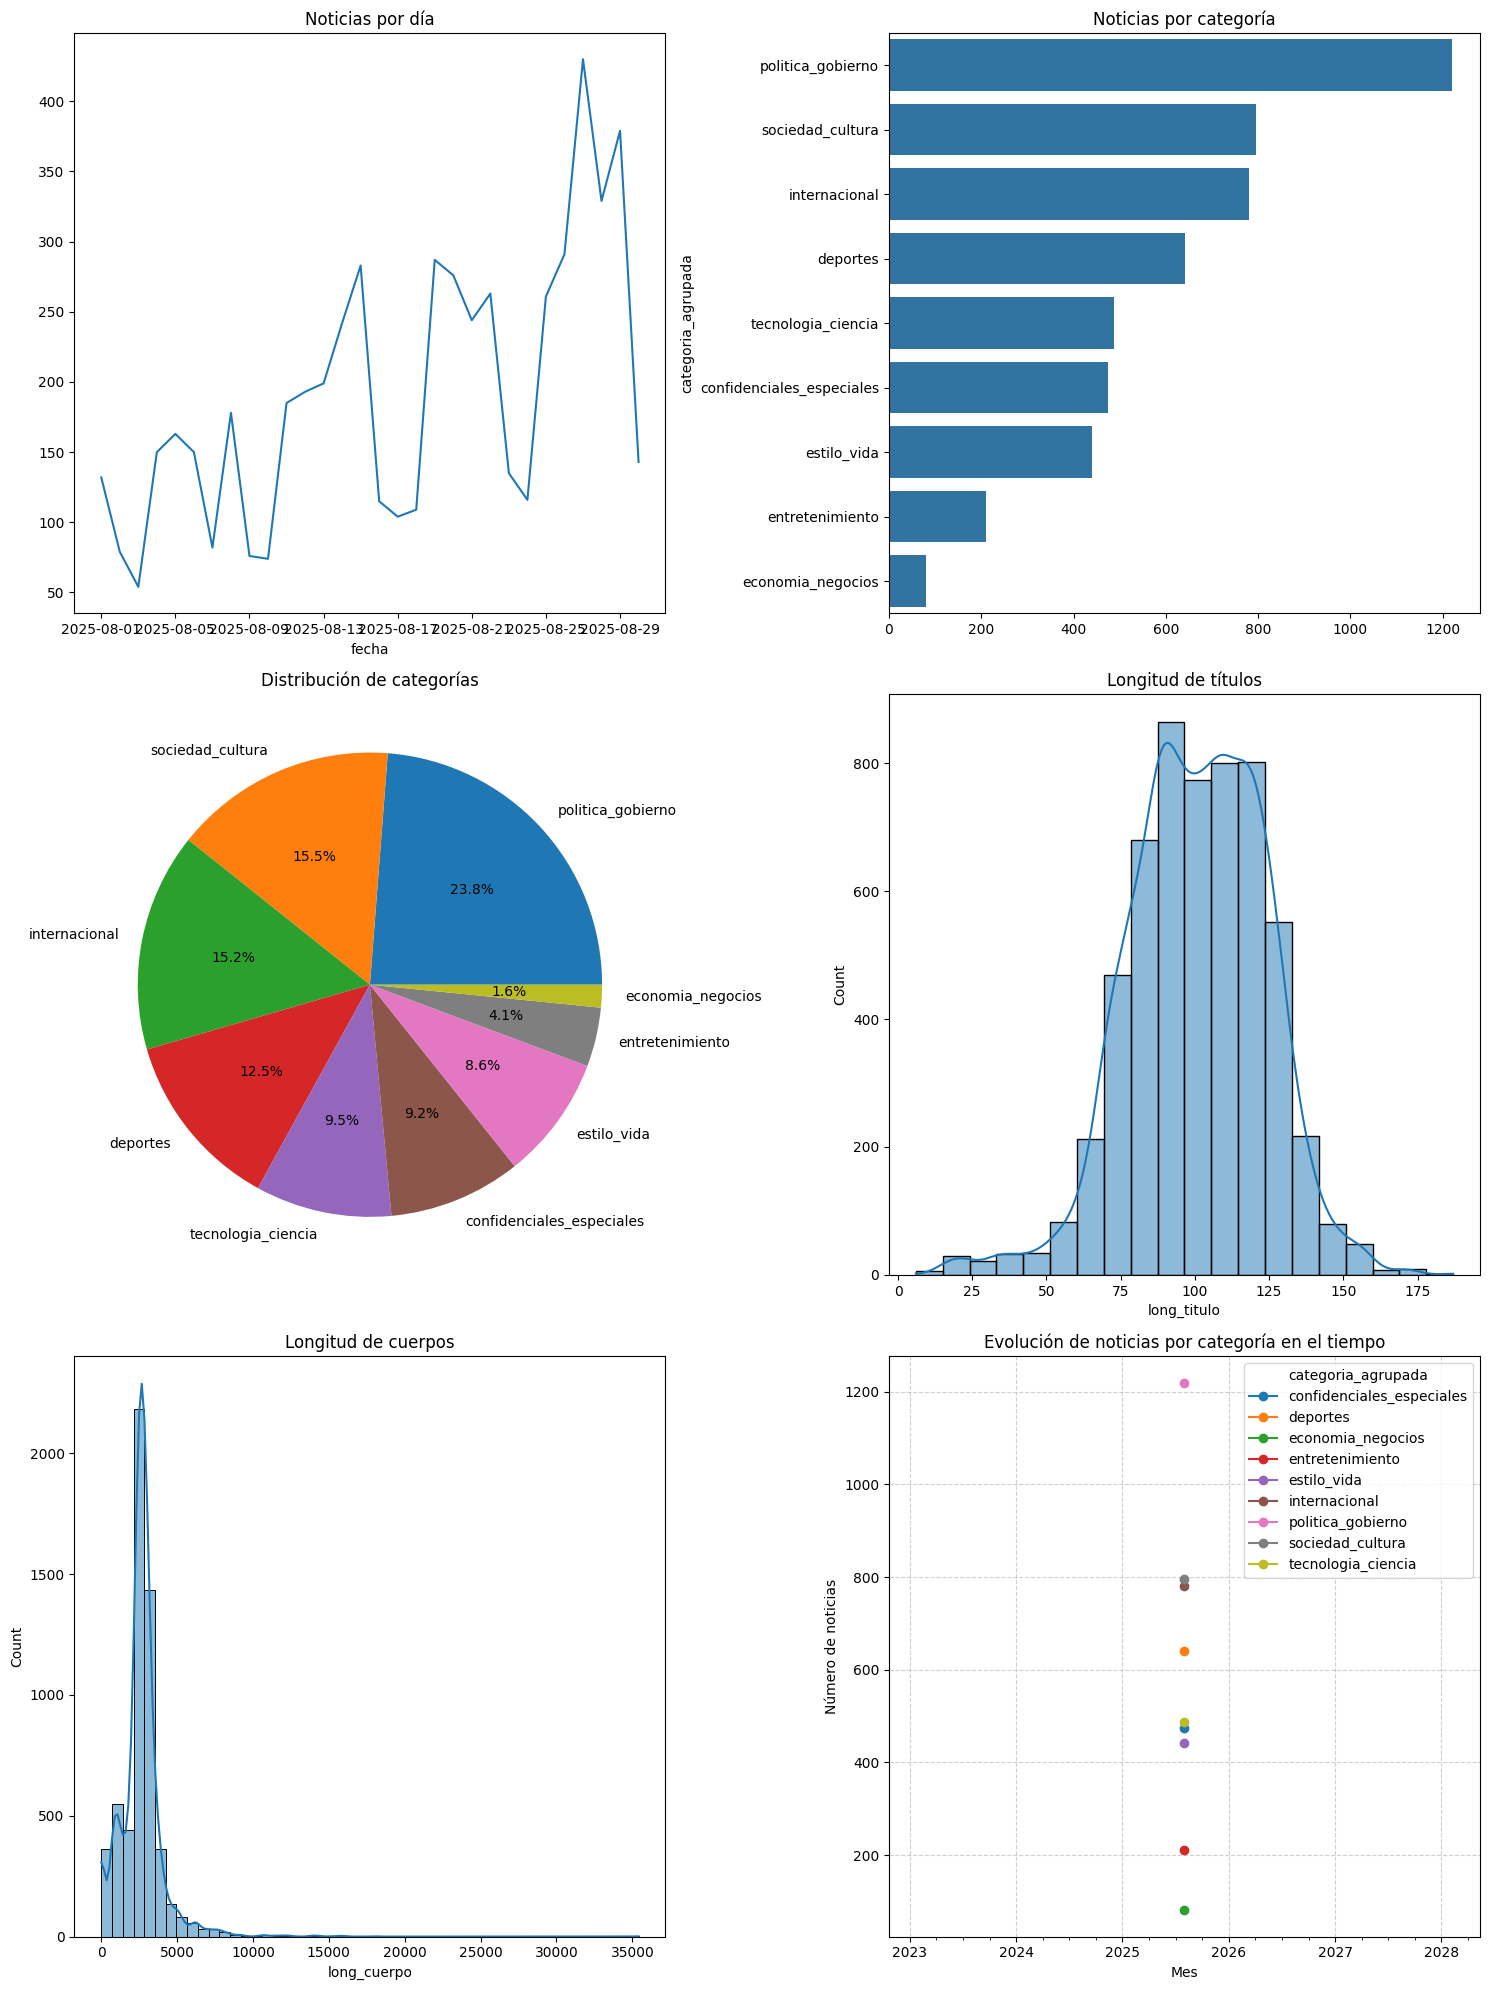

In [ ]:

corpus_completo.columns = corpus_completo.columns.str.lower()
corpus_completo['fecha'] = pd.to_datetime(corpus_completo['fecha'], errors='coerce', utc=True)

# Eliminar filas donde la conversión de fecha falló
corpus_completo.dropna(subset=['fecha'], inplace=True)


# Noticias por día
noticias_por_dia = corpus_completo.groupby(corpus_completo["fecha"].dt.date).size()
# Categorías
conteo_categorias = corpus_completo["categoria_agrupada"].value_counts()
# Longitud de textos
corpus_completo["long_titulo"] = corpus_completo["titulo"].apply(lambda x: len(str(x)))
corpus_completo["long_cuerpo"] = corpus_completo["cuerpo"].apply(lambda x: len(str(x)))
# Evolución mensual
corpus_completo["mes"] = corpus_completo["fecha"].dt.to_period("M")
conteo_mes_cat = corpus_completo.groupby(["mes", "categoria_agrupada"]).size().unstack(fill_value=0)

# --- Crear figura con subplots de 2x3 ---
fig, axes = plt.subplots(3, 2, figsize=(15, 20))
axes = axes.flatten()  # Convertir a lista para acceder fácil

# 1. Noticias por día
noticias_por_dia.plot(kind="line", ax=axes[0], title="Noticias por día")

# 2. Noticias por categoría (barplot)
sns.barplot(x=conteo_categorias.values, y=conteo_categorias.index, ax=axes[1])
axes[1].set_title("Noticias por categoría")

# 3. Noticias por categoría (pie)
conteo_categorias.plot(kind="pie", autopct="%1.1f%%", ax=axes[2])
axes[2].set_ylabel("")  # Quitar etiqueta extra
axes[2].set_title("Distribución de categorías")

# 4. Distribución longitud títulos
sns.histplot(corpus_completo["long_titulo"], bins=20, kde=True, ax=axes[3])
axes[3].set_title("Longitud de títulos")

# 5. Distribución longitud cuerpos
sns.histplot(corpus_completo["long_cuerpo"], bins=50, kde=True, ax=axes[4])
axes[4].set_title("Longitud de cuerpos")

# 6. Evolución mensual de categorías
conteo_mes_cat.plot(kind="line", marker="o", ax=axes[5])
axes[5].set_title("Evolución de noticias por categoría en el tiempo")
axes[5].set_xlabel("Mes")
axes[5].set_ylabel("Número de noticias")
axes[5].grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()


## Interpretación

1. **News by day (top-left)**  
   We observe high variability in the number of daily publications during August 2025. There are days with fewer than 100 articles and spikes exceeding 400, suggesting event-driven surges in news production.

2. **News by category (top-right)**  
   The category with the largest volume is **politics_government**, with more than 1,200 articles, followed by **society_culture** and **international**. This indicates that outlets prioritize political and social topics over economic or regional ones, which are less represented.

3. **Category distribution (center-left)**  
   In relative terms, politics accounts for nearly **one quarter (23.8%)** of the news. Society & culture (15.5%) and international (15.2%) also occupy a significant share, while areas such as economy and business reach only about 1.6%. The distribution confirms a bias toward political and social content.

4. **Headline length (center-right)**  
   Most headlines fall between **80 and 120 characters**, showing a relatively uniform pattern with few extreme values. This reflects some homogeneity in editorial styles.

5. **Body length (bottom-left)**  
   The distribution is much more dispersed: most texts are under **5,000 characters**, though there are outliers up to **35,000 characters** (likely long-form reports or special features). This evidences heterogeneity in article length.

6. **News by category over time (bottom-right)**  
   Although the data cover a single month, politics, society & culture, and international dominate news production. The other categories remain much lower and relatively stable.  
   For deeper analysis, extending the time series across several months would help identify longer-term patterns.

Taken together, the corpus shows a **strong bias toward political and social content**, in both absolute and relative terms. Headlines are relatively homogeneous in length, whereas body texts display high dispersion. These charts suggest the dataset has sufficient variability to train NLP models, but they also reveal a class imbalance (by category) that should be addressed in later classification stages.

---


## Categories and Average Lengths


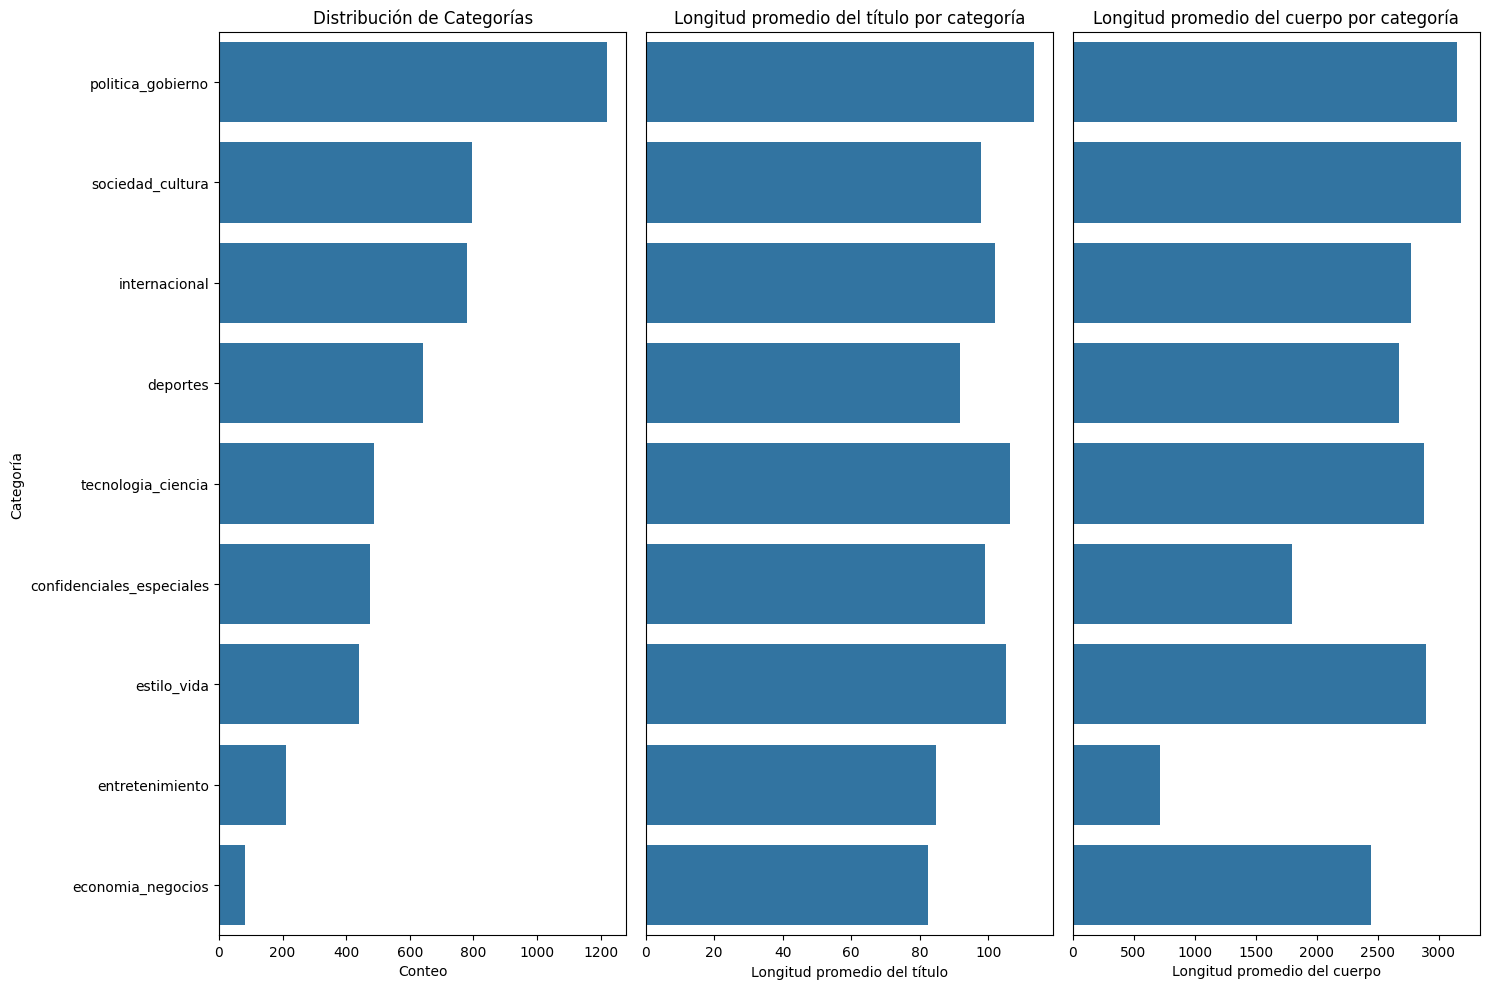

In [ ]:
# --- Código de visualización corregido ---
fig, ax = plt.subplots(1, 3, figsize=(15, 10))

# Obtiene el orden de las categorías para mantener la consistencia
categoria_order = corpus_completo['categoria_agrupada'].value_counts().index

# Gráfico 1: Distribución de categorías
sns.barplot(
    x=corpus_completo['categoria_agrupada'].value_counts(),
    y=categoria_order,
    orient='y',
    ax=ax[0])

ax[0].set_xlabel('Conteo')
ax[0].set_ylabel('Categoría')
ax[0].set_title('Distribución de Categorías')

# Gráfico 2: Longitud promedio de los títulos por categoría
sns.barplot(
    x=corpus_completo.groupby('categoria_agrupada')['long_titulo'].mean(),
    y=corpus_completo.groupby('categoria_agrupada')['long_titulo'].mean().index,
    orient='y',
    ax=ax[1],
    order=categoria_order)

ax[1].set_xlabel('Longitud promedio del título')
ax[1].yaxis.set_visible(False)
ax[1].set_title('Longitud promedio del título por categoría')

# Gráfico 3: Longitud promedio del cuerpo por categoría
sns.barplot(
    x=corpus_completo.groupby('categoria_agrupada')['long_cuerpo'].mean(),
    y=corpus_completo.groupby('categoria_agrupada')['long_cuerpo'].mean().index,
    orient='y',
    ax=ax[2],
    order=categoria_order)

ax[2].set_xlabel('Longitud promedio del cuerpo')
ax[2].yaxis.set_visible(False)
ax[2].set_title('Longitud promedio del cuerpo por categoría')

plt.tight_layout()
plt.show()


1. **Category distribution (left chart)**  
   The **politics_government** category is once again the dominant one, with more than 1,200 articles, followed by society_culture, international, and sports. In contrast, economy_business and entertainment are the least represented. This confirms an **imbalance in the corpus**, which is relevant for any supervised classification task.

2. **Average headline length by category (center chart)**  
   In general, headlines have a similar length (between **80 and 100 characters on average**), with slight variations:

   - **technology_science** and **international** tend to have slightly longer headlines.  
   - **entertainment** and **economy_business** show shorter headlines on average.  
     This reflects differences in editorial style depending on the topic.

3. **Average body length by category (right chart)**  
   Here, greater heterogeneity is observed:  
   - **society_culture** and **economy_business** contain the longest articles (around 3,000 characters on average), suggesting more detailed reports.  
   - **entertainment** produces much shorter texts (less than 1,000 characters on average), indicating brief notes.  
   - Politics, international, and sports fall into an intermediate range (between 2,000 and 2,500 characters).

These charts show that while **headlines are relatively homogeneous in length**, the **body texts vary significantly by category**. Moreover, the **imbalance in the number of articles per category** reinforces the need to consider class-balancing techniques for NLP modeling tasks.


---

## News Distribution in _El Espectador_


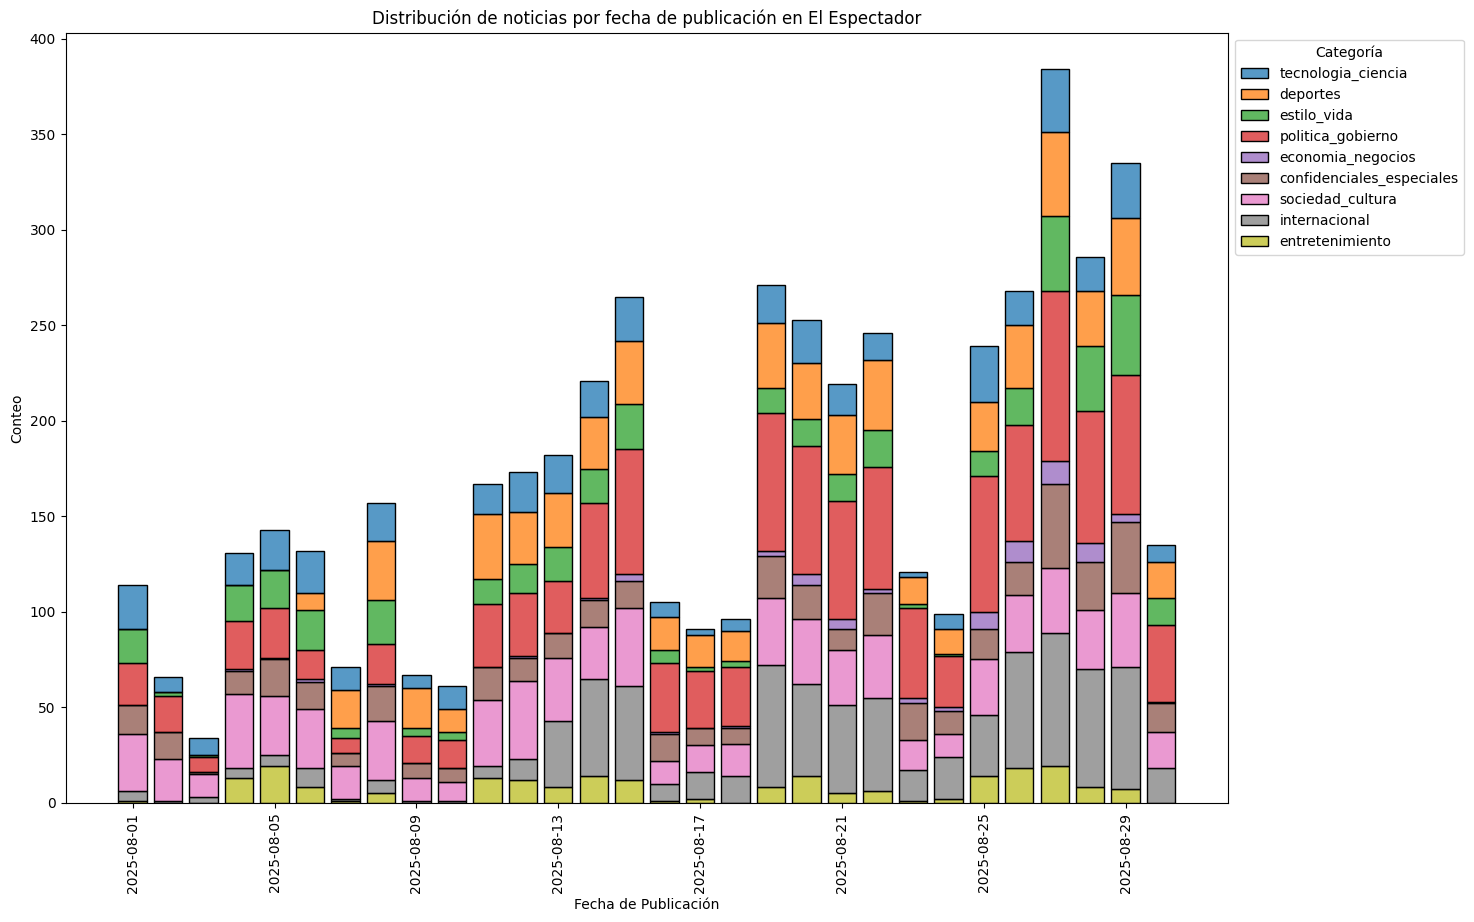

In [ ]:
# --- Código de visualización corregido ---
plt.figure(figsize=(15, 10))

ax = sns.histplot(
    data=corpus_completo,
    x=corpus_completo['fecha'].dt.date, # Agrupado por día para la visualización
    hue='categoria_agrupada',
    multiple="stack",
    shrink=.8,)

sns.move_legend(
    ax, "upper left",
    bbox_to_anchor=(1, 1), ncol=1, title='Categoría', frameon=True,)

plt.xlabel('Fecha de Publicación')
plt.xticks(rotation=90)
plt.ylabel('Conteo')
plt.title('Distribución de noticias por fecha de publicación en El Espectador')
plt.show()


The chart shows the daily evolution of the number of publications in _El Espectador_, broken down by category:

1. **Variability in daily volume**  
   The number of published articles varies significantly: some days see fewer than 50 articles, while on peaks such as **August 27 and 28** the count exceeds 350 publications. This suggests event-driven moments that increased news production.

2. **Predominant categories**
   - **politics_government** is the most frequent category throughout the month, accounting for a large share of the bars on the highest-output days.
   - **society_culture** and **international** also appear consistently, though to a lesser extent.
   - **economy_business** and **entertainment** are clearly marginal, with very limited representation.

3. **Thematic diversification**  
   Despite the dominance of politics, a mix of categories is observed on nearly every day. This reflects the newspaper’s **thematic plurality**, albeit with a bias toward political content.

_El Espectador_ maintains a highly volatile news flow concentrated on **political topics**, which intensifies at specific points in the month. The other categories function as a complement, ensuring some diversity but with a much smaller weight.


---

## Daily News Across the Entire Corpus


/tmp/ipython-input-517050200.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("viridis")


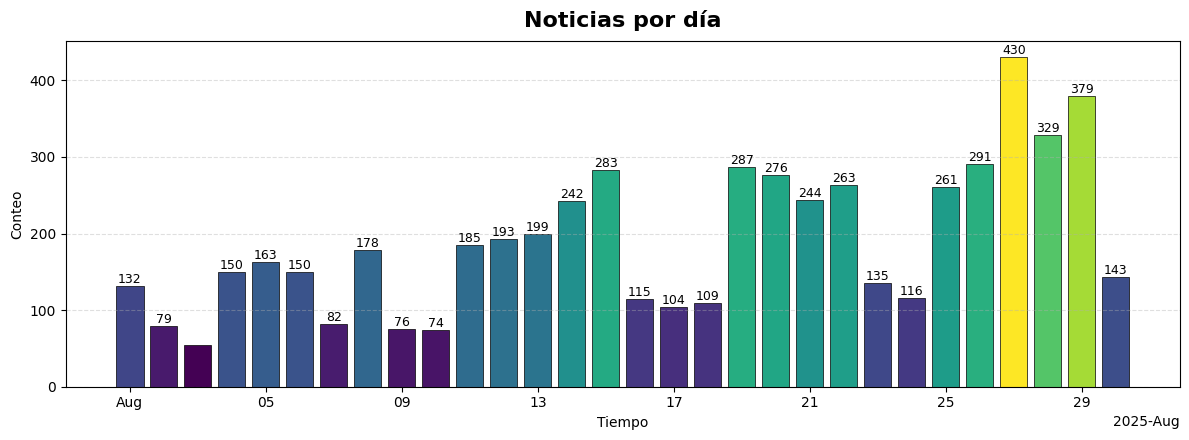

In [ ]:
import matplotlib.dates as mdates
import matplotlib.cm as cm # Import cm

corpus_completo['fecha'] = pd.to_datetime(corpus_completo['fecha'], errors='coerce', utc=True).dt.tz_localize(None)


diario = conteos_por_intervalo(corpus_completo, freq='D')
plot_barras_temporales(diario, titulo="Noticias por día")

The chart shows the evolution of publication volume for **the combined corpus** (El Espectador, Semana, and El Colombiano) during August 2025:

1. **Progressive growth over the month**  
   During the first week, daily volumes range between **70 and 180 articles**, but from the second week onward there is a sustained increase, surpassing **250 publications per day**.

2. **Publication spikes**
   - On **August 27**, the maximum was reached with **430 articles**, the highest activity of the month.
   - Other notable peaks occurred between **August 19 and 21**, with more than 280 articles per day.
   - The final stretch of the month (**August 28 and 29**) also shows high volumes, close to 380 publications.

3. **Variability and concentration**  
   The flow is not uniform: outlets seem to intensify production around specific dates, likely tied to political, social, or international events that dominated the news agenda.

The corpus reveals a **progressive increase in news activity** during August 2025, with marked peaks in the third and fourth weeks of the month. This confirms that media tend to react to specific events, generating concentrated bursts of coverage that are key for trend analysis and for subsequent NLP modeling.


---

## Weekly News Across the Entire Corpus (August 2025)


/tmp/ipython-input-517050200.py:56: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  area_color = cm.get_cmap("Blues")(0.3)


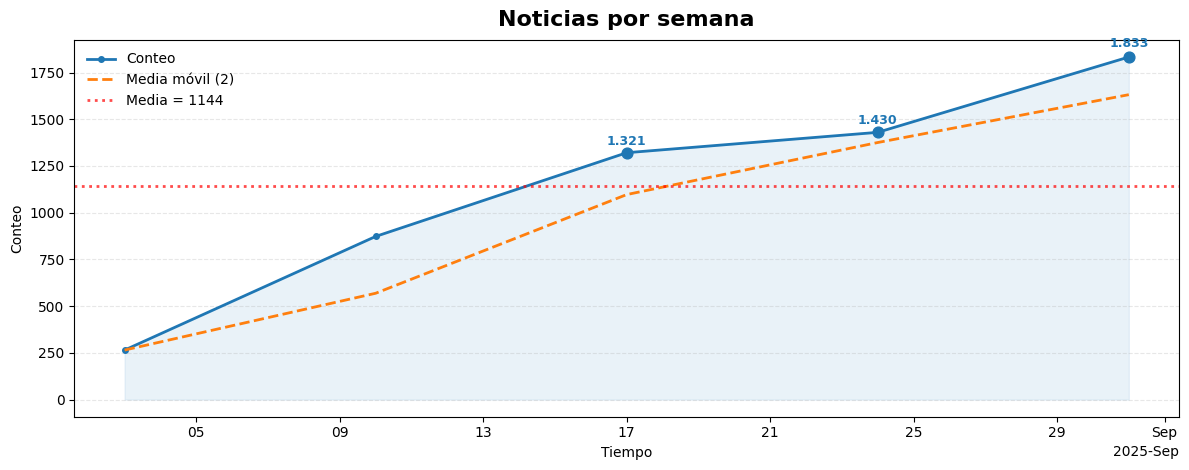

In [ ]:
semanal = conteos_por_intervalo(corpus_completo, freq='W')
plot_linea_area(semanal, titulo="Noticias por semana", rol_window=2)

The chart reflects a **growing trend** in the number of news articles collected during August 2025. However, it is important to clarify that this behavior is not solely due to the actual dynamics of media production, but also to technical factors of the **scraping process**:

1. **Date-related scraping bias**  
   Scraping was carried out more intensively in the **last days of the month**, which partly explains why the final weeks show a much higher volume of articles. It is possible that not all the news from the first part of the month was collected with the same level of thoroughness.

2. **Observed trend**
   - Week 1: ~250 articles  
   - Week 2: ~880 articles  
   - Week 3: ~1,321 articles  
   - Week 4: ~1,430 articles  
   - Week 5: ~1,833 articles  

   The last week stands out with a publication peak, but this increase may be amplified by scraping coverage.

3. **Mean and moving average**
   - **Overall mean:** 1,144 articles per week.  
   - **2-week moving average:** confirms the upward trend, though influenced by the more exhaustive scraping toward the end.

The corpus shows a **progressive increase in the number of weekly articles**, but this rise does not necessarily reflect media activity alone. It is also affected by the **uneven intensity of scraping**, which was more thorough during the final days of the month.


---

## Descriptive Statistics of Text Lengths

In [ ]:
corpus['len_char'] = corpus['cuerpo'].astype(str).str.len()
corpus['len_word'] = corpus['cuerpo'].astype(str).str.split().str.len()

print("=== Longitud en caracteres ===")
print(corpus['len_char'].describe())

print("\n=== Longitud en palabras ===")
print(corpus['len_word'].describe())

=== Longitud en caracteres ===
count     6302.000000
mean      2731.850682
std       1562.394941
min          3.000000
25%       2190.000000
50%       2646.500000
75%       3124.750000
max      35411.000000
Name: len_char, dtype: float64

=== Longitud en palabras ===
count    6302.000000
mean      442.516820
std       254.155198
min         1.000000
25%       353.000000
50%       427.000000
75%       504.000000
max      5573.000000
Name: len_word, dtype: float64


The length distribution shows that most articles fall within a relatively narrow range: around **2,600–2,700 characters**, equivalent to roughly **420 words**. This corresponds to the standard of a short or medium news note, giving the corpus a homogeneous baseline for analysis.

The mean is only slightly higher than the median, indicating **moderate positive skewness**: there are much longer articles that pull the average upward, but the vast majority cluster within the interquartile range (≈2,200–3,100 characters or 350–500 words).

At the extremes, there are notable **outliers**. On one end, very long pieces (up to 35,000 characters or 5,500 words) that likely correspond to special reports. On the other end, extremely short notes (fewer than 10 characters or a single word), which appear to be scraping errors or incomplete records.

These observations suggest two methodological steps: (1) **filter out minimal articles** that do not provide substantive information (<100–150 words), and (2) decide whether it is advisable to **truncate or handle separately** the longest texts to prevent them from distorting subsequent analyses or the training of NLP models.


---

## Word Cloud (without preprocessing)


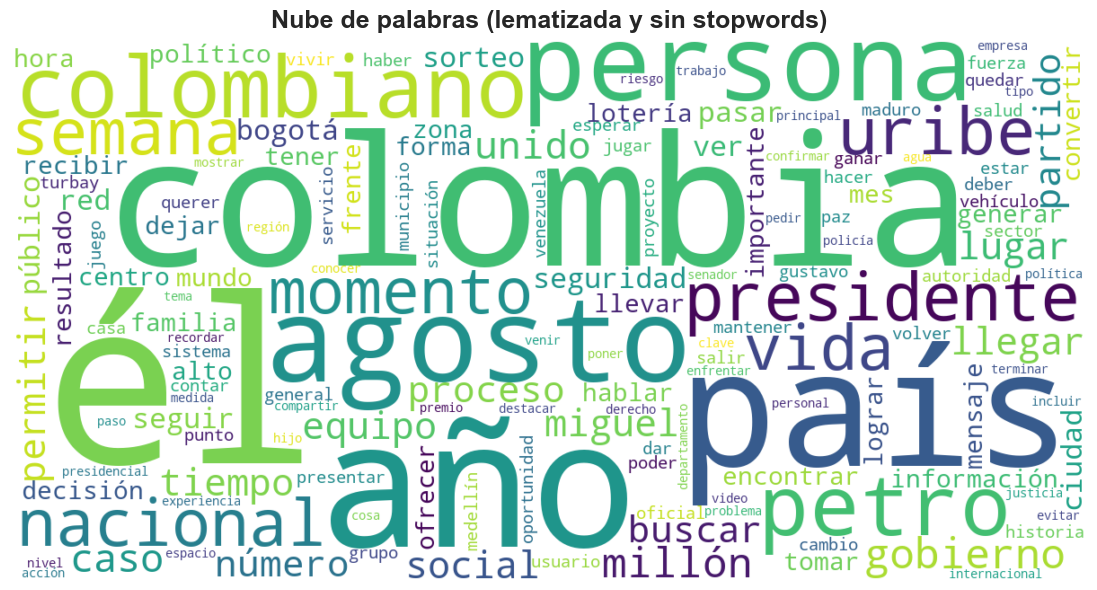

In [ ]:
from wordcloud import WordCloud
from spacy.attrs import IS_STOP, IS_PUNCT, IS_ALPHA, LEMMA

nlp = spacy.load("es_core_news_sm")


texts = corpus['cuerpo'].dropna().astype(str)
tokens_filtrados = lemmas_filtrados_docs(texts , nlp)
texto_filtrado = " ".join(tokens_filtrados)

wordcloud = WordCloud(width=1200, height=600,background_color='white',max_words=150,
                      colormap='viridis',collocations=False).generate(texto_filtrado)

plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nube de palabras (lematizada y sin stopwords)", fontsize=18, fontweight='bold', pad=10)
plt.show()

This word cloud was generated **before any preprocessing**: **no** stopwords were removed and **no** lemmatization was applied. Hence, very frequent but uninformative terms like “el” appear, as well as temporal markers (“año,” “agosto”). The presence of proper names mixed with function words confirms that the text still needs cleaning (remove stopwords, normalize/lemmatize, handle casing and accents, and process entities) before using it in NLP analyses or models.


---

## Analisis de Bi-Gramas y Tri-Gramas del corpus


In [ ]:
from collections import Counter

docs = list(nlp.pipe(corpus['cuerpo'].dropna().astype(str), disable=["ner", "parser"]))

tokens_filtrados = []
for doc in docs:
    for token in doc:
        if not token.is_stop and not token.is_punct and token.is_alpha:
            tokens_filtrados.append(token.lemma_.lower())

bigramas = Counter(zip(tokens_filtrados, tokens_filtrados[1:]))
trigramas = Counter(zip(tokens_filtrados, tokens_filtrados[1:], tokens_filtrados[2:]))


print("=== Top 15 Bigramas ===")
for (w1, w2), c in bigramas.most_common(15):
    print(f"{w1} {w2}: {c}")

print("\n=== Top 15 Trigramas ===")
for (w1, w2, w3), c in trigramas.most_common(15):
    print(f"{w1} {w2} {w3}: {c}")

=== Top 15 Bigramas ===
miguel uribe: 1457
gustavo petro: 1335
red social: 1244
uribe turbay: 1173
sorteo lotería: 1003
presidente gustavo: 757
inteligencia artificial: 630
llevar cabo: 616
centro democrático: 570
álvaro uribe: 548
millón pesos: 530
nicolás maduro: 522
precandidato presidencial: 492
número suerte: 438
uribe londoño: 411

=== Top 15 Trigramas ===
miguel uribe turbay: 955
presidente gustavo petro: 753
expresidente álvaro uribe: 301
agosto llevar cabo: 287
álvaro uribe vélez: 270
llevar cabo sorteo: 268
miguel uribe londoño: 256
cabo sorteo lotería: 239
ganador sorteo lotería: 225
ofrecer posibilidad ganar: 217
ganar premio millonario: 215
posibilidad ganar premio: 215
sorteo transmitir vivo: 213
resultado consultar página: 212
premio millonario modalidad: 211


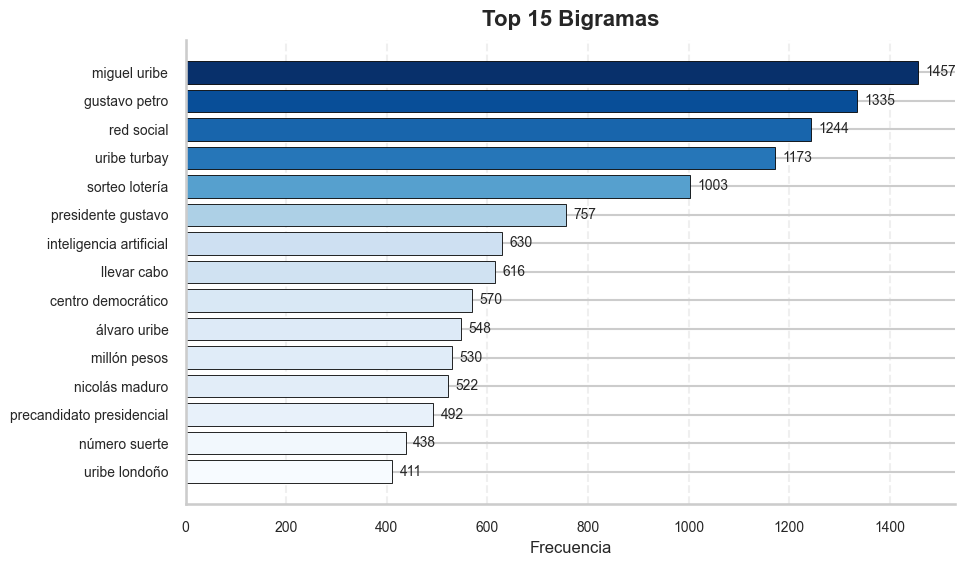

In [ ]:
top_bigrams = bigramas.most_common(15)
labels = [f"{w1} {w2}" for (w1, w2), _ in top_bigrams]
counts = np.array([c for _, c in top_bigrams])

norm = (counts - counts.min()) / (counts.max() - counts.min() + 1e-9)
colors = plt.colormaps.get_cmap("Blues")(norm)

plt.figure(figsize=(10, 6))
bars = plt.barh(labels[::-1], counts[::-1], color=colors[::-1], edgecolor="black", linewidth=0.6)
plt.title("Top 15 Bigramas", fontsize=16, fontweight="bold", pad=10)
plt.xlabel("Frecuencia", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.3)

for bar, value in zip(bars, counts[::-1]):
    plt.text(bar.get_width() + counts.max()*0.01,
             bar.get_y() + bar.get_height()/2,
             str(value),
             va='center', fontsize=10)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

The bigram analysis highlights the most frequent word combinations in the news articles. The results reflect both the **political agenda** and certain **social and current-affairs topics**:

- Political figures stand out: _“miguel uribe”_, _“gustavo petro”_, _“álvaro uribe”_, _“uribe turbay”_, _“uribe londoño”_. This confirms that a large share of the news content is centered on national politics and public figures.
- **Institutions and parties** also appear: _“centro democrático”_, _“precandidato presidencial”_, underscoring electoral and party-focused coverage.
- There are **recurrent non-political topics** such as _“red social”_ (social network), _“inteligencia artificial”_ (artificial intelligence), or _“sorteo lotería”_ (lottery drawing), indicating diversity in the media agenda.
- Other terms like _“millón pesos”_ (a million pesos) or _“número suerte”_ (lucky number) reflect everyday-economy news or entertainment sections.

The bigrams confirm that the corpus is strongly biased toward **national politics** (especially around figures like Petro and Uribe), though varied topics (technology, lotteries, social networks) also appear. This will be key when training NLP models, since dominant bigrams may influence classification; it is important to account for this **thematic imbalance**.


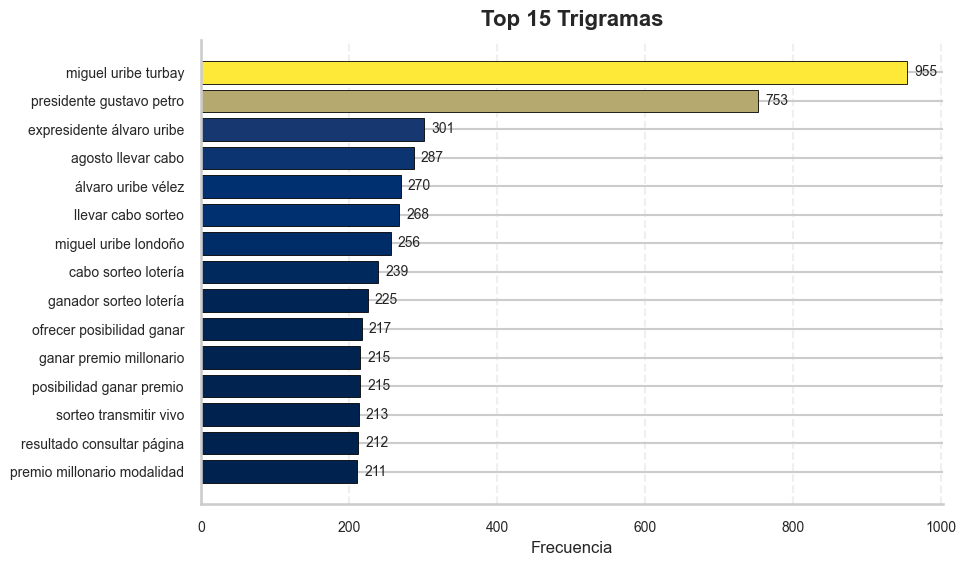

In [ ]:
top_trigrams = trigramas.most_common(15)
labels = [f"{w1} {w2} {w3}" for (w1, w2, w3), _ in top_trigrams]
counts = np.array([c for _, c in top_trigrams])
norm = (counts - counts.min()) / (counts.max() - counts.min() + 1e-9)
colors = plt.colormaps.get_cmap("cividis")(norm)

plt.figure(figsize=(10, 6))
bars = plt.barh(labels[::-1], counts[::-1], color=colors[::-1], edgecolor="black", linewidth=0.6)
plt.title("Top 15 Trigramas", fontsize=16, fontweight="bold", pad=10)
plt.xlabel("Frecuencia", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.3)

for bar, value in zip(bars, counts[::-1]):
    plt.text(bar.get_width() + counts.max()*0.01,
             bar.get_y() + bar.get_height()/2,
             str(value),
             va='center', fontsize=10)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

The trigram analysis reveals more specific combinations of terms, offering a clearer picture of the dominant topics in the corpus:

- **National politics**: names of political figures and public offices recur, such as _“miguel uribe turbay”_, _“presidente gustavo petro”_, _“expresidente álvaro uribe”_, and _“álvaro uribe vélez”_. This confirms that the political agenda is the central axis of much of the news.
- **Events and temporality**: terms like _“agosto llevar cabo”_ (“August carry out”) show how the analyzed month surfaces in frequent expressions, reinforcing the need to filter temporal markers during preprocessing.
- **Lotteries and drawings**: expressions such as _“llevar cabo sorteo”_ (“carry out the drawing”), _“cabo sorteo lotería”_ (“lottery drawing”), _“ganador sorteo lotería”_ (“lottery drawing winner”), or _“premio millonario modalidad”_ (“million-peso prize format”) suggest that entertainment and chance-related content has significant weight in the corpus.
- **Other patterns**: phrases like _“ofrecer posibilidad ganar”_ (“offer the chance to win”) or _“sorteo transmitir vivo”_ (“drawing broadcast live”) relate to advertising or service notes, evidencing thematic diversity beyond politics.

The trigrams confirm two major axes in the corpus:

1. **Colombian politics**, centered on key actors and parties.  
2. **Lotteries and chance-related content**, appearing frequently in headlines and bodies.

This finding reflects a mix of **highly relevant national topics** with **mass-market entertainment news**, which should be taken into account when designing classification or topic-detection tasks.
